## Ciência de Dados - Atividade 2
### Atividade prática de exploração e análise de base de dados
### Base de dados 'ENEM 2022'
---
**Docente:** Roseli Aparecida Romero  
**Discente:** Thiago Rafael Mariotti Claudio - 15611674  
**Data 15/02/2024**

# Exploração inicial e tratamento da base de dados

Antes mesmo de formular quaisquer hipoteses, precisamos abrir a base e realizar uma exploração inicial, fazendo uma limpeza ou busca por possíveis erros, caso necessário.  
Para isso importaremos as ferramentas necessárias, nesse caso **pandas** e **numpy** para manipulação de _datasets_ e manipulação de dados númericos, respectivamente.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ENEM/amostra_enem2022.csv', delimiter=',')

display(df.head(6))

print("\n\nLabel e tipagem de todas as colunas da base")
df.dtypes

,Unnamed: 0,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_TREINEIRO,TP_SEXO,TP_ESCOLA,TP_COR_RACA,SG_UF_PROVA
0,2401255,441.9,477.6,424.9,436.3,740.0,0,F,2,1,MA
1,3283840,415.9,490.0,300.0,396.8,480.0,0,F,2,2,MT
2,1745004,403.0,371.8,460.2,411.0,620.0,0,F,2,1,SP
3,2781081,NaN,NaN,NaN,NaN,NaN,1,F,1,1,DF
4,1712844,466.3,545.3,548.1,486.9,720.0,0,M,2,1,PE
5,839510,NaN,NaN,NaN,NaN,NaN,0,F,1,1,SP




Label e tipagem de todas as colunas da base


Unnamed: 0           int64
NU_NOTA_CN         float64
NU_NOTA_CH         float64
NU_NOTA_LC         float64
NU_NOTA_MT         float64
NU_NOTA_REDACAO    float64
IN_TREINEIRO         int64
TP_SEXO             object
TP_ESCOLA            int64
TP_COR_RACA          int64
SG_UF_PROVA         object
dtype: object

Note que existe uma coluna sem nome (_label_). Podemos inferir que essa coluna refere-se ao UID (identificador unico) do estudante. Para isso podemos verificar se os valores nessa coluna são únicos.

In [3]:
if df['Unnamed: 0'].unique().size == df['Unnamed: 0'].size:
    print(f"A quantidade de valores unicos na coluna é IGUAL ao tamanho da coluna: {df['Unnamed: 0'].size} == {df['Unnamed: 0'].unique().size}\n")
else:
    print(f"A coluna não é composta unicamente de valores unicos.\n")

A quantidade de valores unicos na coluna é IGUAL ao tamanho da coluna: 10000 == 10000



Confirmamos que a coluna possui somente valores únicos, logo a hipotese de que essa coluna refere-se à um UID ou similar faz sentido. Para fins práticos, renomearemos essa coluna de **Unnamed: 0** para **UID_ESTUDANTE**.

In [4]:
df.rename(columns={"Unnamed: 0": "UID_ESTUDANTE"},inplace=True)

Como observado acima, as colunas já estão corretamente tipadas. Embora caibam aqui algumas observações:  
- **UID_ESTUDANTE** poderia ser do tipo _object_ (string). No entanto, ambos os tipos são intercabiaveis no contexto de identificação, e, essa coluna não tera muita relevância no estudo.
- **TP_SEXO** poderia ser do tipo _boleano_ ou _inteiro_, visto que os dados da coluna assumem apenas dois valores, **M** ou **F**. Novamente, tanto o tipo _string_ quanto os tipos mencionados acima são aplicaveis aqui.
- A mesma observação se aplica para **TP_ESCOLA**, que poderia ser _string_, **SG_UF_PROVA** que poderia ser _inteiro_ com enumeração.

In [5]:


df.dtypes

UID_ESTUDANTE        int64
NU_NOTA_CN         float64
NU_NOTA_CH         float64
NU_NOTA_LC         float64
NU_NOTA_MT         float64
NU_NOTA_REDACAO    float64
IN_TREINEIRO         int64
TP_SEXO             object
TP_ESCOLA            int64
TP_COR_RACA          int64
SG_UF_PROVA         object
dtype: object

É interessante verificar os atributos categoricos, como tipo de escola, raça ou treineiro, para uma eventual análise de correlação. Verifica-se que o atributo com maior quantidade de categorias é **TP_ESCOLA**, com 3 categorias para o tipo de escola.
Vamos realizar a substituição dos valores dessas colunas por _strings_ deles mesmos.

In [6]:
df['TP_ESCOLA'].describe()

count    10000.000000
mean         1.433300
std          0.601654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: TP_ESCOLA, dtype: float64

In [7]:
df[['IN_TREINEIRO', 'TP_ESCOLA', 'TP_COR_RACA']] = df[['IN_TREINEIRO', 'TP_ESCOLA', 'TP_COR_RACA']].replace({0: '0', 1: '1', 2: '2', 3: '3'})

Ao realizar uma visualização simples da base em formato tabular com o _display_ das primeiras 10 linhas, podemos observar que existem alguns registros númericos vazios (_NaN_). Será que podemos remover esses dados da base?

In [8]:
display(df.head(10))

,UID_ESTUDANTE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_TREINEIRO,TP_SEXO,TP_ESCOLA,TP_COR_RACA,SG_UF_PROVA
0,2401255,441.9,477.6,424.9,436.3,740.0,0,F,2,1,MA
1,3283840,415.9,490.0,300.0,396.8,480.0,0,F,2,2,MT
2,1745004,403.0,371.8,460.2,411.0,620.0,0,F,2,1,SP
3,2781081,NaN,NaN,NaN,NaN,NaN,1,F,1,1,DF
4,1712844,466.3,545.3,548.1,486.9,720.0,0,M,2,1,PE
5,839510,NaN,NaN,NaN,NaN,NaN,0,F,1,1,SP
6,775495,NaN,440.0,533.4,NaN,660.0,0,F,1,3,BA
7,1348409,NaN,NaN,NaN,NaN,NaN,0,F,1,3,AM
8,3040163,569.4,428.9,337.1,704.6,580.0,0,M,1,1,RS
9,329325,460.7,515.8,475.2,454.1,580.0,0,M,1,3,MA


In [9]:
for col in df.columns:
        print(f"A coluna {col} possui {df[col].isnull().sum()} valores NaN")

A coluna UID_ESTUDANTE possui 0 valores NaN
A coluna NU_NOTA_CN possui 3286 valores NaN
A coluna NU_NOTA_CH possui 2922 valores NaN
A coluna NU_NOTA_LC possui 2922 valores NaN
A coluna NU_NOTA_MT possui 3286 valores NaN
A coluna NU_NOTA_REDACAO possui 2922 valores NaN
A coluna IN_TREINEIRO possui 0 valores NaN
A coluna TP_SEXO possui 0 valores NaN
A coluna TP_ESCOLA possui 0 valores NaN
A coluna TP_COR_RACA possui 0 valores NaN
A coluna SG_UF_PROVA possui 0 valores NaN


In [10]:
for col in df.columns:
    if col in ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]:
        count = (df[col] == 0).sum()
        print(f"A coluna {col} possui {count} zeros")

A coluna NU_NOTA_CN possui 2 zeros
A coluna NU_NOTA_CH possui 17 zeros
A coluna NU_NOTA_LC possui 3 zeros
A coluna NU_NOTA_MT possui 1 zeros
A coluna NU_NOTA_REDACAO possui 347 zeros


Como observado na celula acima, exceto as colunas referentes à notas, todas as outras não possuem valores nulos (_NaN_,_None_,_Null_), indicando dessa forma que esses valores nulos representam os dias em que determinado candidato não realizou a prova. Além existe uma quantidade significativa de valores "zero" nas colunas de nota.
Também não podemos zerar tais valores, pois atrapalharia futuras analises como tendencia a desistência e afins, além de impactar em valores números, como média ou estudo de tendência e possível causalidade para o zero em determinada área de conhecimento.
O que podemos fazer é criar dois datasets, um para candidatos que prestaram a prova, e outro para candidatos que não prestaram em pelo menos um dos dias.

In [11]:
df_presenca = df.copy()
df_presenca = df_presenca.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])
df_falta = df.copy()
df_falta = df_falta[df_falta.isna().any(axis=1)]

Vamos verificar a correlação dos dados com a base de dados em sua totalidade.

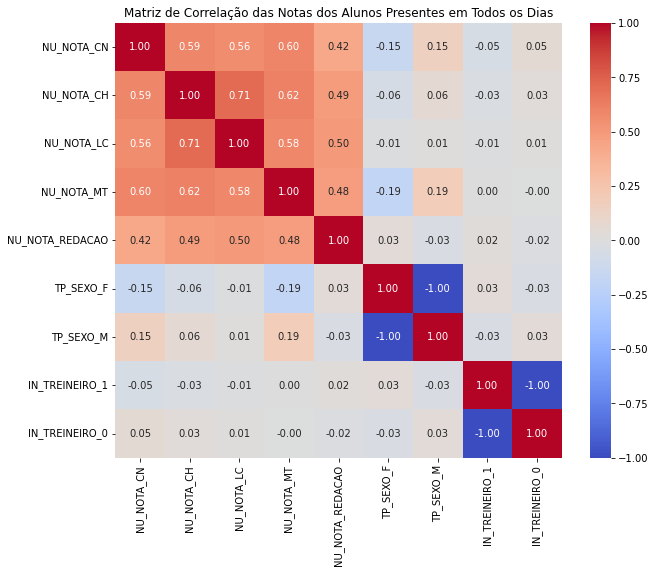

In [26]:
import seaborn as sns

df_presenca_encoded = df.copy()

df_presenca_encoded = pd.get_dummies(df_presenca_encoded, columns=['TP_SEXO','IN_TREINEIRO'])

colunas_analise = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_SEXO_F', 'TP_SEXO_M','IN_TREINEIRO_1', 'IN_TREINEIRO_0']
notas_alunos_presenca_encoded = df_presenca_encoded[colunas_analise]

cor = notas_alunos_presenca_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=cor, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação das Notas dos Alunos Presentes em Todos os Dias')
plt.show()

# Testando hipoteses e visualizando dados

**1\. Existe alguma relação entre o sexo do canditato e seu desempenho?**  
**2\. Candidatos treineiros tem um desempenho necessariamente pior que o dos candidatos que prestaram para ingresso ao ensino superior?**  
**3\. Existe alguma correlação entre o desempenho das áreas de conhecimento?**  

Para as perguntar acima, os atributos de maior importância são: **IN_TREINEIRO**,**TP_SEXO** além das **NOTAS**.

Primeiramente podemos verificar a relação entre candidatos do sexo _Masculino_ e _Feminino_. 

count     10000
unique        2
top           F
freq       6177
Name: TP_SEXO, dtype: object

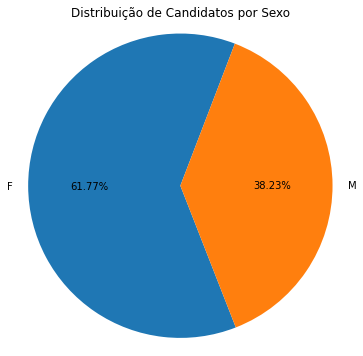

In [12]:

display(df['TP_SEXO'].describe())
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(df['TP_SEXO'].value_counts(), labels=df['TP_SEXO'].value_counts().index, autopct='%1.2f%%', startangle=69)
plt.title('Distribuição de Candidatos por Sexo')
plt.axis('equal')
plt.show()

Vamos verificar a tendência das notas através das medidas de tendência.

In [13]:
df_f = df_presenca.copy()
df_f = df_presenca[df_presenca['TP_SEXO'] == 'F']
df_m = df_presenca.copy()
df_m = df_presenca[df_presenca['TP_SEXO'] == 'M']
notas = df_f[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]

for nota in notas:
    display(df_f[nota].describe())
    display(df_m[nota].describe())

count    4124.000000
mean      487.791343
std        68.631737
min       362.700000
25%       435.000000
50%       476.850000
75%       531.525000
max       787.700000
Name: NU_NOTA_CN, dtype: float64

count    2554.000000
mean      510.204229
std        77.329890
min         0.000000
25%       450.250000
50%       502.150000
75%       563.050000
max       796.700000
Name: NU_NOTA_CN, dtype: float64

count    4124.000000
mean      526.065301
std        76.593304
min         0.000000
25%       479.900000
50%       527.500000
75%       576.225000
max       760.000000
Name: NU_NOTA_CH, dtype: float64

count    2554.000000
mean      536.540211
std        85.205216
min         0.000000
25%       482.625000
50%       544.250000
75%       594.275000
max       775.400000
Name: NU_NOTA_CH, dtype: float64

count    4124.000000
mean      519.702837
std        75.057723
min         0.000000
25%       473.275000
50%       526.600000
75%       573.025000
max       737.700000
Name: NU_NOTA_LC, dtype: float64

count    2554.000000
mean      522.543735
std        76.412534
min       277.800000
25%       473.150000
50%       531.400000
75%       578.050000
max       742.200000
Name: NU_NOTA_LC, dtype: float64

count    4124.000000
mean      526.946557
std       110.230429
min       336.800000
25%       436.975000
50%       514.350000
75%       604.300000
max       936.700000
Name: NU_NOTA_MT, dtype: float64

count    2554.000000
mean      571.080110
std       119.907173
min         0.000000
25%       477.225000
50%       566.200000
75%       653.600000
max       973.300000
Name: NU_NOTA_MT, dtype: float64

count    4124.000000
mean      637.914646
std       207.867372
min         0.000000
25%       540.000000
50%       640.000000
75%       800.000000
max       980.000000
Name: NU_NOTA_REDACAO, dtype: float64

count    2554.000000
mean      622.732968
std       192.303663
min         0.000000
25%       540.000000
50%       620.000000
75%       760.000000
max       980.000000
Name: NU_NOTA_REDACAO, dtype: float64

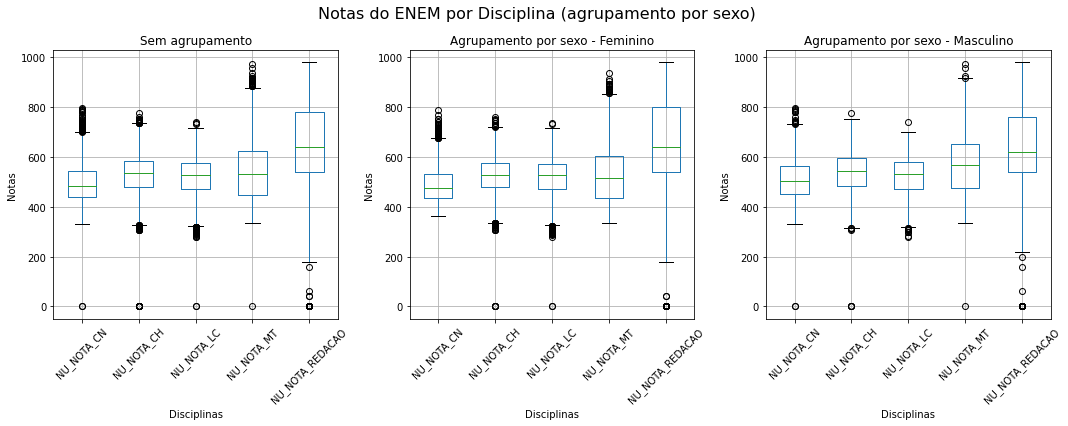

In [14]:
dfs = [df_presenca, df_f, df_m]

plt.figure(figsize=(15, 6))
for i, df_iter in enumerate(dfs):
    plt.subplot(1, 3, i+1)
    notas = df_iter[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
    notas.boxplot()
    if i == 0:
        plt.title(f'Sem agrupamento')
    elif i == 1:
        plt.title(f'Agrupamento por sexo - Feminino')
    elif i == 2:
        plt.title(f'Agrupamento por sexo - Masculino')
    plt.xlabel('Disciplinas')
    plt.ylabel('Notas')
    plt.xticks(rotation=45)

plt.suptitle('Notas do ENEM por Disciplina (agrupamento por sexo)', fontsize=16)
plt.tight_layout()
plt.show()

Nota-se um desempenho mediano das candidatas com relação a maioria do conhecimento, embora a nota de redalção possua bons resultados. Vamos analisar a distribuição de notas para essa área. 

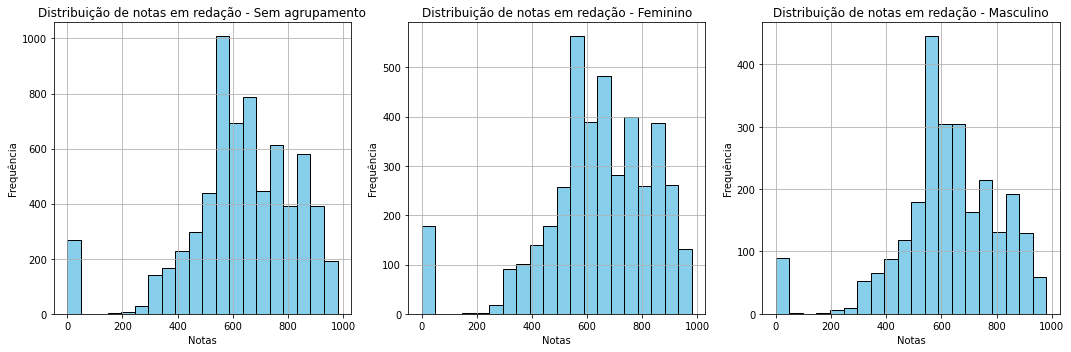

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (df_iter, titulo) in enumerate([(df_presenca, 'Sem agrupamento'), (df_f, 'Feminino'), (df_m, 'Masculino')]):
    nota_redacao = df_iter['NU_NOTA_REDACAO'].dropna()
    axs[i].hist(nota_redacao, bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribuição de notas em redação - {titulo}')
    axs[i].set_xlabel('Notas')
    axs[i].set_ylabel('Frequência')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Vamos repetir a analise para candidatos treineiro e não-treineiro, verificando uma possível distribuição de notas para cada classe.

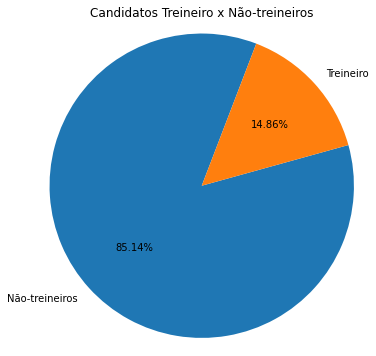

In [16]:
plt.figure(figsize=(6, 6))
plt.pie(df['IN_TREINEIRO'].value_counts(), labels=['Não-treineiros','Treineiro'], autopct='%1.2f%%', startangle=69)
plt.title('Candidatos Treineiro x Não-treineiros')
plt.axis('equal')
plt.show()

In [17]:


df_treineiro = df.copy()
df_treineiro = df_treineiro[df_treineiro['IN_TREINEIRO'] == '1']
df_nao_treineiro = df.copy()
df_nao_treineiro = df_nao_treineiro[df_nao_treineiro['IN_TREINEIRO'] == '0']

display(df_treineiro[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].describe())
display(df_nao_treineiro[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].describe())

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,1221.000000,1294.000000,1294.000000,1221.000000,1294.000000
mean,488.615643,522.160896,516.585471,544.105815,630.741886
std,66.308806,80.804082,74.324781,108.717289,203.949950
min,0.000000,0.000000,277.800000,336.800000,0.000000
25%,438.300000,482.200000,473.300000,453.600000,560.000000
50%,482.100000,533.250000,527.050000,540.300000,640.000000
75%,534.500000,575.675000,571.800000,624.600000,760.000000
max,697.600000,703.000000,685.400000,906.300000,980.000000


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,5493.000000,5784.000000,5784.000000,5493.000000,5784.000000
mean,498.043637,528.415716,519.037880,543.561915,620.705394
std,74.226416,82.527576,77.147239,117.887343,210.902035
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,440.600000,478.000000,469.500000,447.400000,520.000000
50%,486.300000,531.200000,526.400000,531.200000,620.000000
75%,546.600000,583.100000,574.000000,622.600000,780.000000
max,796.700000,775.400000,742.200000,973.300000,980.000000


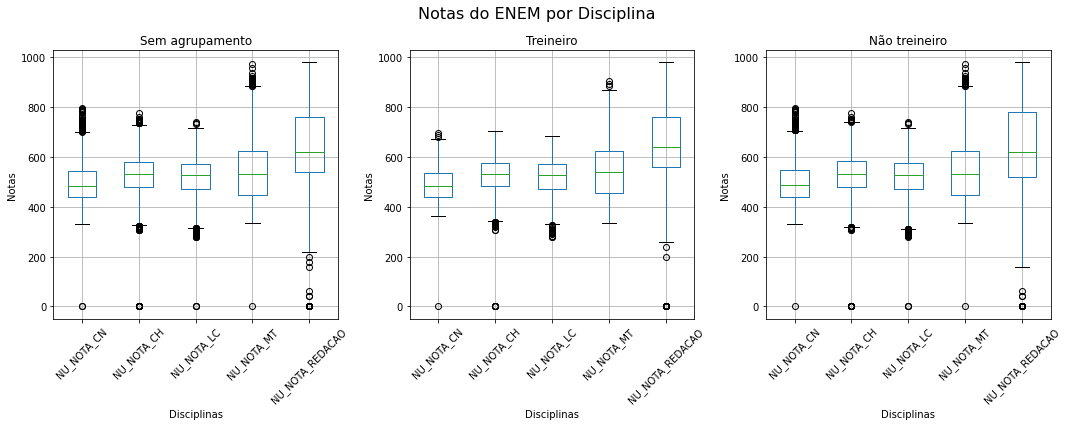

In [18]:
dfs = [df, df_treineiro, df_nao_treineiro]

plt.figure(figsize=(15, 6))
for i, df_iter in enumerate(dfs):
    plt.subplot(1, 3, i+1)
    notas = df_iter[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
    notas.boxplot()
    if i == 0:
        plt.title(f'Sem agrupamento')
    elif i == 1:
        plt.title(f'Treineiro')
    elif i == 2:
        plt.title(f'Não treineiro')
    plt.xlabel('Disciplinas')
    plt.ylabel('Notas')
    plt.xticks(rotation=45)

plt.suptitle('Notas do ENEM por Disciplina', fontsize=16)
plt.tight_layout()
plt.show()

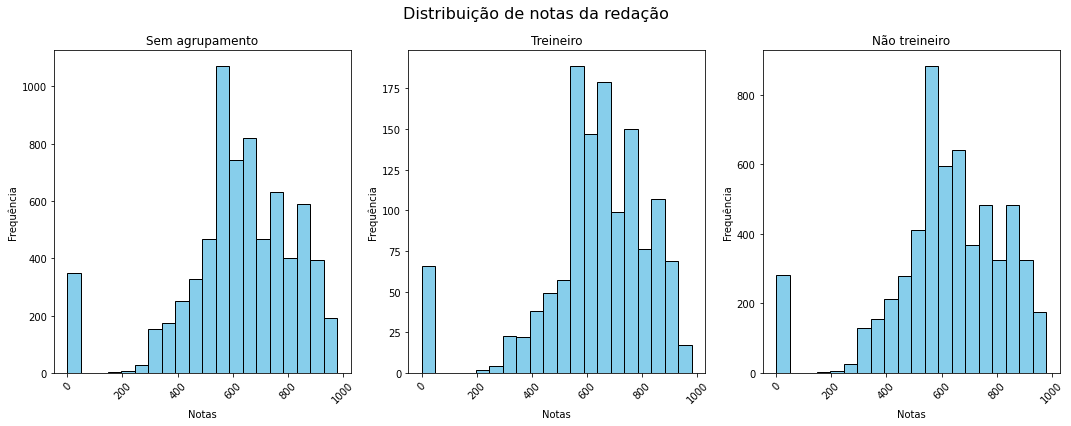

In [19]:
dfs = [df, df_treineiro, df_nao_treineiro]

plt.figure(figsize=(15, 6))
for i, df_iter in enumerate(dfs):
    plt.subplot(1, 3, i+1)
    nota_redacao = df_iter['NU_NOTA_REDACAO'].dropna()
    plt.hist(nota_redacao, bins=20, color='skyblue', edgecolor='black')
    if i == 0:
        plt.title(f'Sem agrupamento')
    elif i == 1:
        plt.title(f'Treineiro')
    elif i == 2:
        plt.title(f'Não treineiro')
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.suptitle('Distribuição de notas da redação', fontsize=16)
plt.tight_layout()
plt.show()


Podemos verificar também a hipotese de candidatos treineiros terem uma mairo tendência a não prestar a prova.

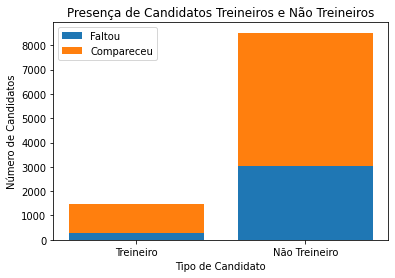

In [20]:
faltas_treineiro = df_treineiro[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].isnull().any(axis=1).sum()
faltas_nao_treineiro = df_nao_treineiro[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].isnull().any(axis=1).sum()

presencas_treineiro = len(df_treineiro) - faltas_treineiro
presencas_nao_treineiro = len(df_nao_treineiro) - faltas_nao_treineiro

plt.bar(['Treineiro', 'Não Treineiro'], [faltas_treineiro, faltas_nao_treineiro], label='Faltou')
plt.bar(['Treineiro', 'Não Treineiro'], [presencas_treineiro, presencas_nao_treineiro], bottom=[faltas_treineiro, faltas_nao_treineiro], label='Compareceu')

plt.xlabel('Tipo de Candidato')
plt.ylabel('Número de Candidatos')
plt.title('Presença de Candidatos Treineiros e Não Treineiros')
plt.legend()
plt.show()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,6678.000000,6678.000000,6678.000000,6678.000000,6678.000000
mean,496.363148,530.071429,520.789338,543.825427,632.108416
std,72.895201,80.152036,75.585643,116.019516,202.176755
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,440.400000,481.000000,473.225000,448.925000,540.000000
50%,485.300000,533.800000,528.500000,533.600000,640.000000
75%,544.575000,583.100000,574.875000,622.800000,780.000000
max,796.700000,775.400000,742.200000,973.300000,980.000000


<Axes: ylabel='Density'>

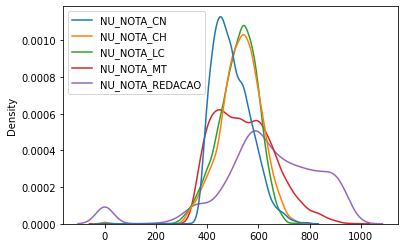

In [22]:
display(df_presenca_encoded[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].describe())
sns.kdeplot(df_presenca_encoded[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']])

In [23]:
display(df_presenca_encoded[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].kurt())

NU_NOTA_CN         0.692036
NU_NOTA_CH         2.134453
NU_NOTA_LC         0.462917
NU_NOTA_MT        -0.218221
NU_NOTA_REDACAO    1.737230
dtype: float64

Podemos realizar a seguinte informação acerca das métricas de __kurtose__ :

- Para a Ciências Naturais, Humanas  e Redação , os valores de kurtosis são maiores do que zero. Isso indica essas áreas podem apresentar uma maior concentração de notas em torno da média, com uma quantidade significativa de outliers.
- Para a Linguagens e Matemática os valores de kurtosis são menores do que zero o que pode apresentar uma dispersão mais ampla de notas, com menos menos outliers.

In [24]:
display(df_presenca_encoded[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].skew())

NU_NOTA_CN         0.560193
NU_NOTA_CH        -0.535520
NU_NOTA_LC        -0.467467
NU_NOTA_MT         0.477492
NU_NOTA_REDACAO   -1.012412
dtype: float64

Podemos realizar a seguinte informação acerca das métricas de __skewness__ :

- Em Ciências Naturais e Matematica temos valores positivos, o que sugere uma assimetria na distribuição dessas notas, indicando maior quantidade de notas baixas.
- Para Humanas e Redação os valores são negativos, sugerindo uma assimetria negativa, indicando maior quantidade de notas maiores nessas áreas do conhecimento.
- Para Linguagens temos uma distribuição simétrica, devido seu valor proximo à zero.

<Axes: ylabel='Count'>

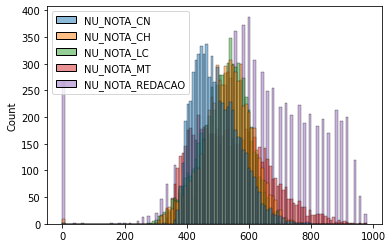

In [25]:
sns.histplot(df_presenca_encoded[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']])

A matriz de correlação acima verifica um possível relacionamento entre diversos atributos, como notas entre diferentes áreas do conhecimento, desempenho por sexo, além de permitir verificar o desempenho dos treineiros.  
Podemos verificar no entanto, que a maioria das correlações são baixas.

Respondendo as hipoteses levantadas:

1. **Existe alguma relação entre o sexo do canditato e seu desempenho?**  
    - Embora exista uma pequena correlação entre o desempenho em Naturais e Matemática e candidatos homens, o coeficiente de correlação é muito proximo de zero, demonstrando que essa relação não é significativa.
2. **Candidatos treineiros tem um desempenho necessariamente pior que o dos candidatos que prestaram para ingresso ao ensino superior?**  
    - Candaditos treineiro surpreendetemente não possuem notas piores que candidatos que pretendem ingressar no ensino superior atraves do ENEM. Na verdade o observado é que ambos os grupos são bem similares em suas distribuições de nota para as áreas do conhecimento. Além disso, embora não possuam incentivo para uso da nota, candidatos treineiro não possuem maior taxa de faltas do que os demais.
3. **Existe alguma correlação entre o desempenho das áreas de conhecimento?** 
    - Embora a similaridade entre duas áreas de conhecimento **não** necessariamente expressa uma alta correlação, candidatos com bom desempenho em _Ciências Naturais_ apresentem resultados relevantes em _Matemática_, assim como _Ciências Humanas_ e _Linguagens_.  